In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import itertools

In [6]:
# Load data, remove the target variable as well as any remaining NaN columns to be sure (none should exist after preprocessing)
df_health_full = pd.read_csv('health_data_preprocessed.csv')

df_health_full.drop('DRK_YN', axis=1,inplace=True)
df_health_full.dropna(inplace=True)

df_health_largest_sample = df_health_full.sample(50000,random_state=42)

# Apply PCA to reduce the data to two components for two dimensional plotting.
pca_largest_sample = PCA(n_components=2, random_state=42) 
pca_largest_sample = pca_largest_sample.fit_transform(df_health_largest_sample)
print(len(pca_largest_sample))

50000


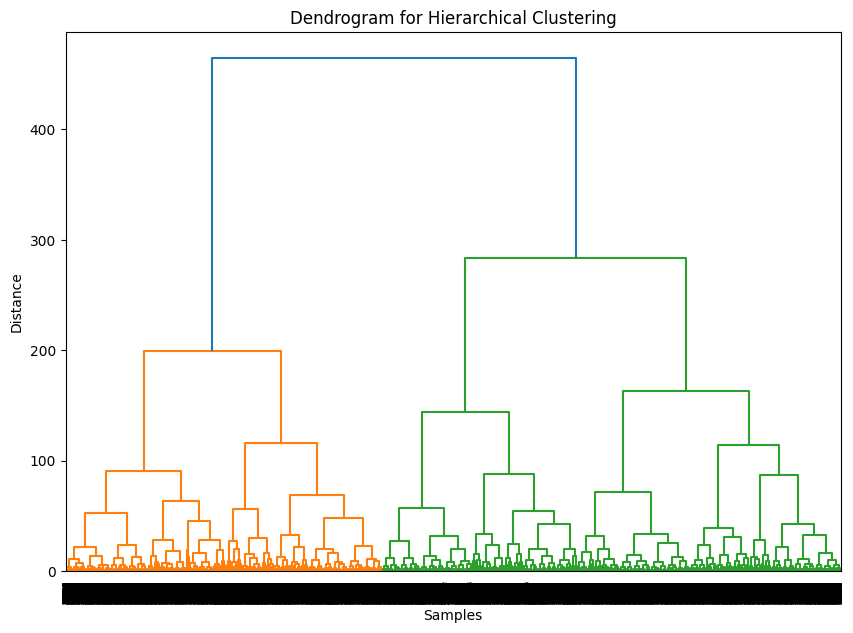

In [7]:
# Create and train the Hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hc.fit_predict(pca_largest_sample)

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_largest_sample, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



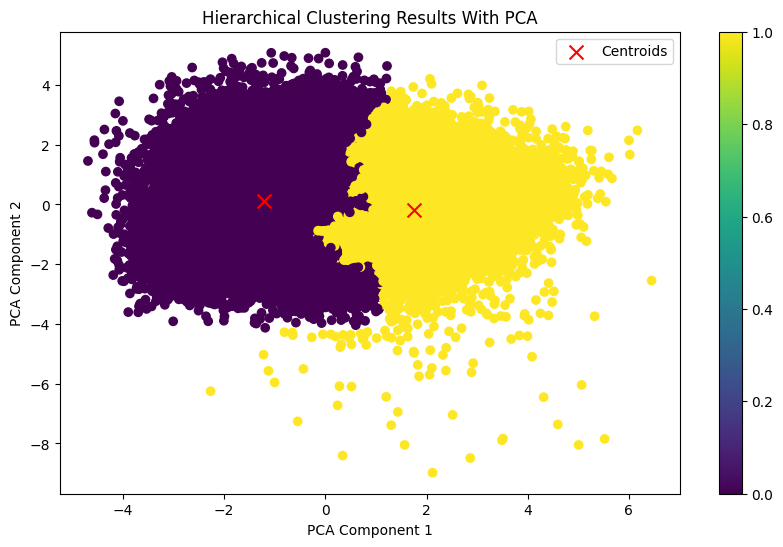

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your PCA-transformed data and labels
# pca_largest_sample: PCA-transformed data
# labels: Cluster labels

# Calculate the centroids
unique_labels = np.unique(labels)
centroids = np.array([pca_largest_sample[labels == label].mean(axis=0) for label in unique_labels])

# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_largest_sample[:, 0], pca_largest_sample[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Hierarchical Clustering Results With PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [8]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_largest_sample, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pca_largest_sample, labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(pca_largest_sample, labels)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

Silhouette Score: 0.38402545279442113
Davies-Bouldin Index: 0.9947
Calinski-Harabasz Score: 37015.3659
